<h1 style="font-size:50px">Prédiction du taux de clics</h1>
<p>L'ensemble de données peut être trouvé <a href="https://www.kaggle.com/c/avazu-ctr-prediction/data">ici</a>.<p>

In [6]:
# Import des dépendances

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

pd.set_option('display.max_columns', 30)

In [3]:
# Declaration des types de données

types_train = {
    'id': np.dtype(np.int64),
    'click': np.dtype(np.int64),
    'hour': np.dtype(np.int64),
    'C1': np.dtype(np.int64),
    'banner_pos': np.dtype(np.int64),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(np.int64),
    'device_conn_type': np.dtype(np.int64),
    'C14': np.dtype(np.int64),
    'C15': np.dtype(np.int64),
    'C16': np.dtype(np.int64),
    'C17': np.dtype(np.int64),
    'C18': np.dtype(np.int64),
    'C19': np.dtype(np.int64),
    'C20': np.dtype(np.int64),
    'C21':np.dtype(np.int64)
}

types_test = {
    'id': np.dtype(np.int64),
    'hour': np.dtype(np.int64),
    'C1': np.dtype(np.int64),
    'banner_pos': np.dtype(np.int64),
    'site_id': np.dtype(str),
    'site_domain': np.dtype(str), 
    'site_category': np.dtype(str),
    'app_id': np.dtype(str),
    'app_domain': np.dtype(str),
    'app_category': np.dtype(str),
    'device_id': np.dtype(str),
    'device_ip': np.dtype(str),
    'device_model': np.dtype(str),
    'device_type': np.dtype(np.int64),
    'device_conn_type': np.dtype(np.int64),
    'C14': np.dtype(np.int64),
    'C15': np.dtype(np.int64),
    'C16': np.dtype(np.int64),
    'C17': np.dtype(np.int64),
    'C18': np.dtype(np.int64),
    'C19': np.dtype(np.int64),
    'C20': np.dtype(np.int64),
    'C21':np.dtype(np.int64)
}

<h2 style="font-size:40px">1- Echantillonnage</h2>

<p style="color:blue">L'ensemble d'apprentissage contient plus de 40 millions d'enregistrements, pour pouvoir les traiter localement, nous en échantillonnerons au hasard 1 million.</p>

In [109]:
n = 40428967  # nombre total d'enregistrement dans le dataset 
sample_size = 1000000 # taille de l'échantillon
skip_values = sorted(random.sample(range(1, n), n - sample_size))

parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

train = pd.read_csv("data/train.csv", parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)

<ipython-input-109-107fcdda1ca9>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')


In [110]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002044883120869786,0,2014-10-21,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,72aab6df,04258293,1,0,19771,320,50,2227,0,687,100077,48
1,10006958186789044052,1,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,f95efa07,a99f214a,ce6e6bbd,2cd8ff6d,1,0,18993,320,50,2161,0,35,100034,157
2,10009807995169380879,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,396df801,2347f47a,0f2161f8,a99f214a,554d9f5f,36a30aeb,1,0,15705,320,50,1722,0,35,100084,79
3,10010452321736390000,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,cede6db1,a0f5f879,1,0,15701,320,50,1722,0,35,100084,79
4,10011205200760015892,0,2014-10-21,1005,0,6256f5b4,28f93029,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,04a1662e,521f95fe,1,0,17212,320,50,1887,3,39,100202,23


<h2 style="font-size:40px">2 - Vu d'ensemble</h2>

In [114]:
train[train["click"] == 1].shape[0]/train.shape[0]

0.169623

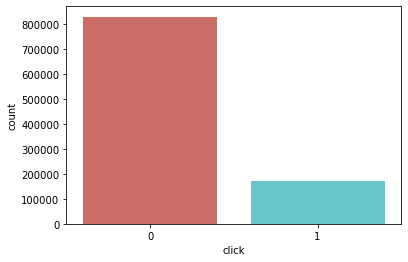

In [113]:
sns.countplot(x='click', data=train, palette='hls')
plt.show();

<p style="color:blue">On remarque que le taux de click global est égal à ~17%.</p>

In [115]:
train.hour.describe()

<ipython-input-115-695499e014d7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.hour.describe()


count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    11067
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

<p style="color:blue">Les données couvrent 10 jours de données de flux de clics de 2014-10-21 à 2014-10-30, soit 240 heures.</p>

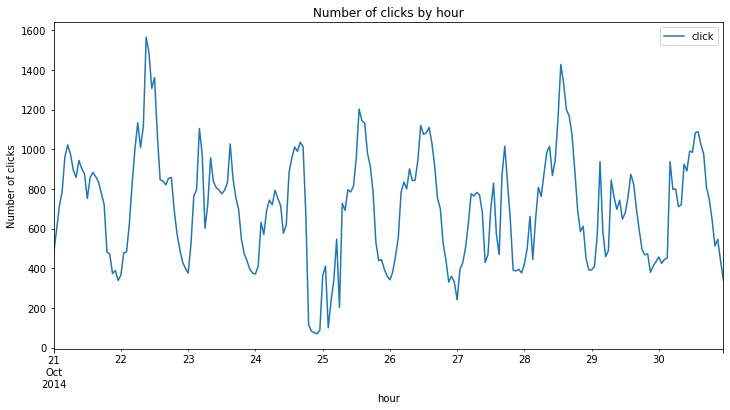

In [116]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

<p style="color:blue">Le modèle de clics horaires est assez similaire chaque jour. Cependant, il y a eu quelques heures de pointe, une au milieu de la journée le 22 octobre et une autre au milieu de la journée le 28 octobre. Et une heure de clic très basse est proche de minuit le 24 octobre.<p>

<h2 style="font-size:40px">3 - Feature engineering</h2>

<h3>heure<h3>

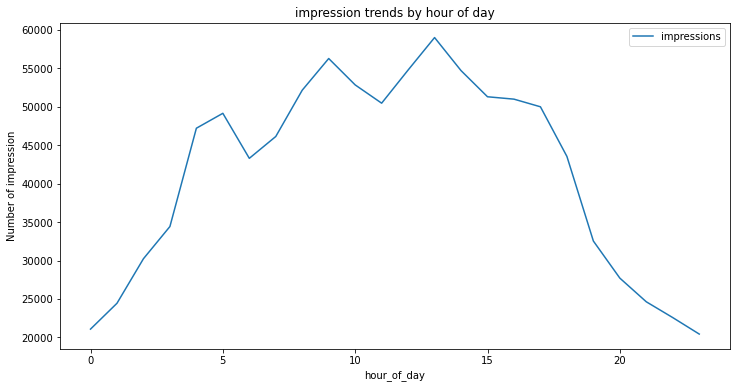

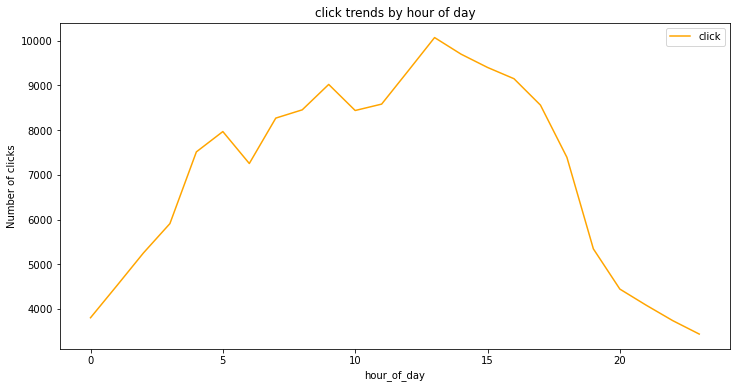

In [117]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)

train.groupby('hour_of_day').agg({'click':'count'}).rename(columns={'click': 'impressions'}).plot(figsize=(12,6))
plt.ylabel('Number of impression')
plt.title('impression trends by hour of day');

train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6), color="orange")
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

<p style="color:blue">En général, le nombre de clics et d'impressions le plus élevé est à l'heure 13h et 14h, et le nombre de clics le plus bas est à l'heure à minuit. Cela semble une feature utile pour une estimation approximative.</p>

<h3>CTR par heur</h3>

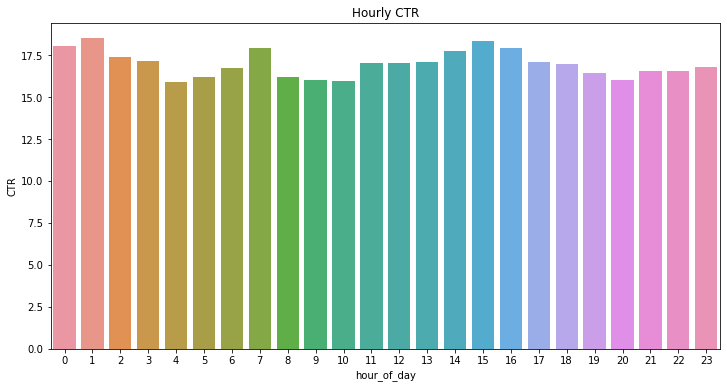

In [118]:
df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

<p style="color:blue">L'une des observations intéressantes ici est que le CTR le plus élevé s'est produit à l'heure 1h et 16heur (~1,7). Plus haut, c'est vers minuit qu'il y a le moins d'affichage et de clics.</p>

<h3>Jours de semaine</h3>

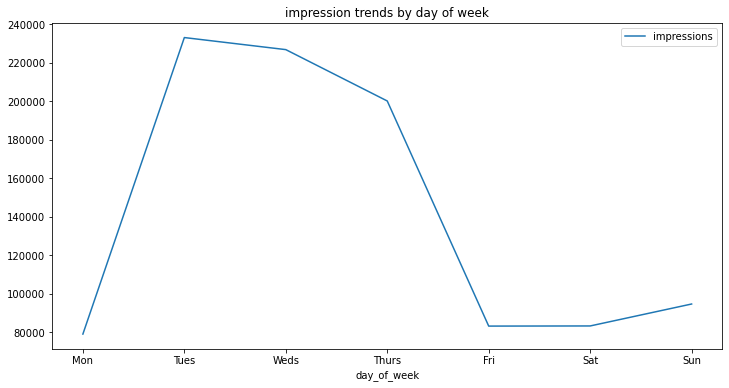

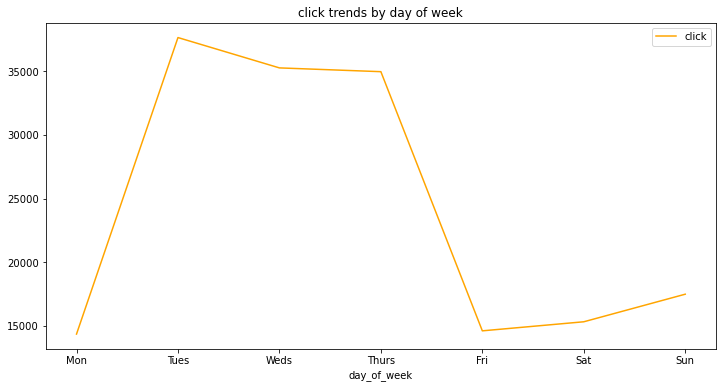

In [119]:
train['day_of_week'] = train['hour'].apply(lambda val: val.day_name())
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

train.groupby('day_of_week').agg({'click':'count'}).rename(columns={'click': 'impressions'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('impression trends by day of week');

train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6), color="orange")
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

<p style="color:blue">Les mardis enregistrent le plus d'impressions et de clics, puis les mercredis, suivis des jeudis. Les lundis et vendredis enregistrent le moins d'impressions et de clics.</p>

<h3>CTR par jour de semaine</h3>

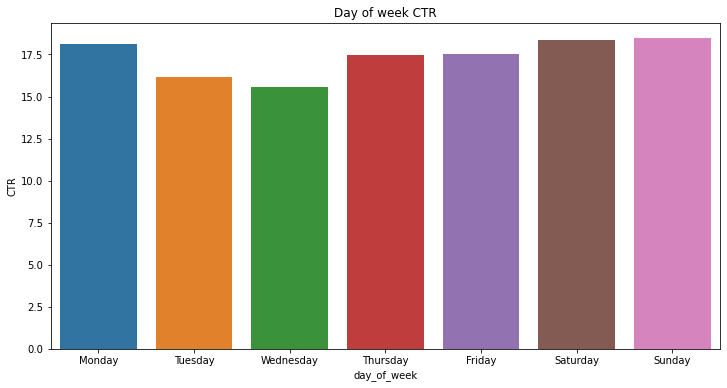

In [120]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

<p style="color:blue">Alors que les mardis et mercredis enregistrent le plus grand nombre d'impressions et de clics, leur CTR est parmi les plus bas. Les samedis et dimanches bénéficient du CTR le plus élevé. Apparemment, les gens ont plus de temps pour cliquer pendant le week-end.</p>

<h3>C1</h3>

<p style="color:blue">C1 est l'une des caractéristiques catégoriques anonymisées. Bien que nous ne connaissions pas sa signification, nous voulons quand même jeter un œil à sa distribution.</p>

In [121]:
print(train.C1.value_counts()/len(train))

1005    0.919046
1002    0.054533
1010    0.022351
1012    0.002810
1007    0.000898
1001    0.000222
1008    0.000140
Name: C1, dtype: float64


<p style="color:blue">La valeur C1 = 1005 contient le plus de d'occurences, près de 92 %. Voyons si nous pouvons trouver la valeur de C1 qui indique quelque chose à propos du CTR.<p>

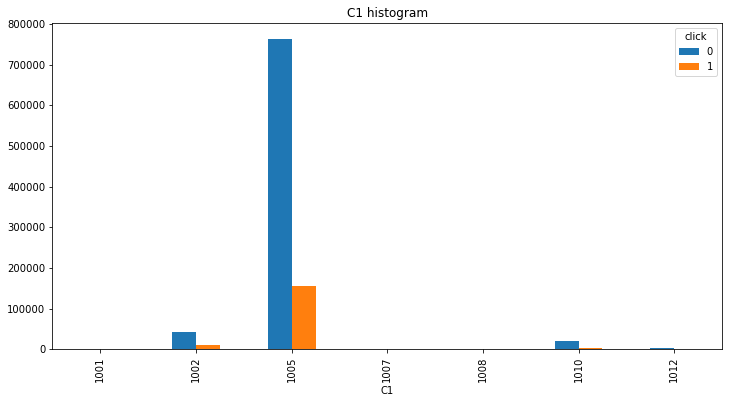

In [122]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

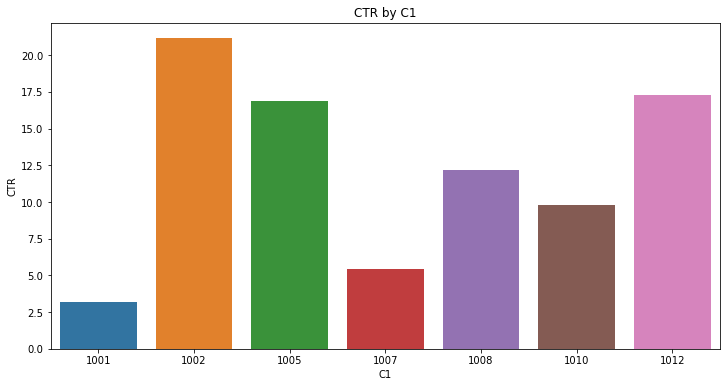

In [123]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

<p style="color:blue">
    Les valeurs C1 et les paires CTR importantes sont :<br/>
    - 1005 : 92 % des données et 0,17 CTR<br/>
    - 1002 : 5,5% des données et 0,21 CTR<br/>
    - 1010 : 2,3% des données et 0,096 CTR<br/>
    - 1002 a un CTR bien supérieur à la moyenne et 1010 a un CTR bien inférieur à la moyenne, il semble que ces deux valeurs C1 soient importantes pour prédire le CTR.<br/>
</p>

<h3>Position de la bannière</h3>

<p style="color:blue">D'après les études la position des bannière affecte les le CTR.</p>

In [124]:
print(train.banner_pos.value_counts()/len(train))

0    0.719863
1    0.278369
7    0.001095
2    0.000274
4    0.000206
5    0.000140
3    0.000053
Name: banner_pos, dtype: float64


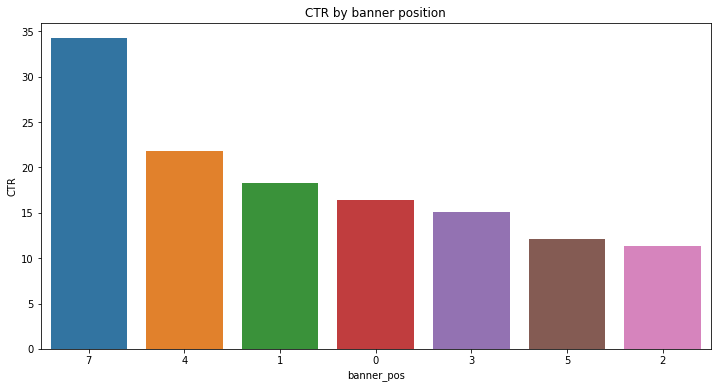

In [125]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

<p style="color:blue">Bien que les positions de bannière 0 et 1 aient le plus grand nombre d'impressions et de clics, la bannière 7 et 4 bénéficie du taux de clics le plus élevé. Augmenter le nombre d'annonces placées sur la bannière en position 7 et 4 semble être une bonne idée.</p>

<h3>Site id</h3>

In [126]:
train.site_id.nunique()

2648

<p style="color:blue">Il y a 2648 sites dans l'ensemble de données.</p>

In [127]:
print('The top 10 site ids that have the most impressions')
print((train.site_id.value_counts()/len(train))[0:10])

The top 10 site ids that have the most impressions
85f751fd    0.361306
1fbe01fe    0.160503
e151e245    0.065274
d9750ee7    0.023899
5b08c53b    0.022630
856e6d3f    0.018995
5b4d2eda    0.018940
a7853007    0.011401
b7e9786d    0.009262
5ee41ff2    0.008712
Name: site_id, dtype: float64


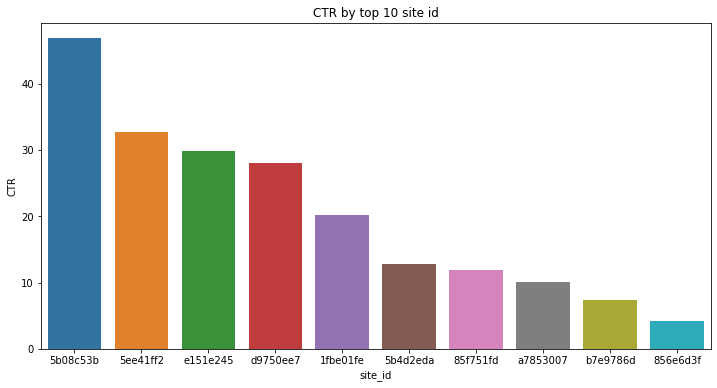

In [128]:
top10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.title('CTR by top 10 site id');

<p style="color:blue">La feature site_id semble importante car les CTR des 10 meilleurs sites (entre 0,48 et 0,04) sont significativement différents du CTR global de ~0,17.</p>

<h3>Site domain</h3>

In [129]:
train.site_domain.nunique()

2856

<p style="color:blue">Il y a 2856 domaines de site dans l'ensemble de données</p>

In [130]:
print('The top 10 site domains that have the most impressions')
print((train.site_domain.value_counts()/len(train))[0:10])

The top 10 site domains that have the most impressions
c4e18dd6    0.374526
f3845767    0.160503
7e091613    0.082240
7687a86e    0.032040
98572c79    0.024730
16a36ef3    0.021060
58a89a43    0.018995
b12b9f85    0.009368
9d54950b    0.009169
17d996e6    0.008830
Name: site_domain, dtype: float64


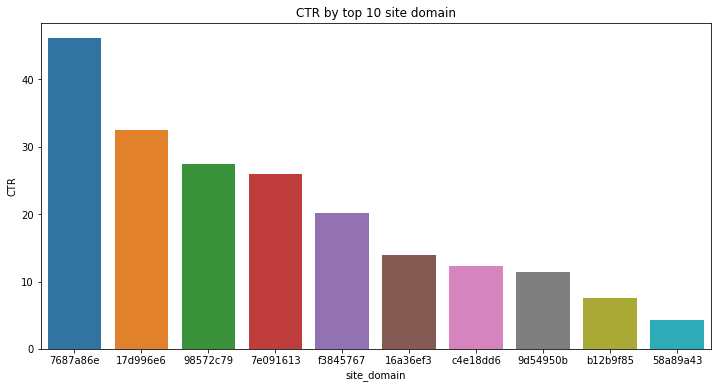

In [131]:
top10_domain = train[(train.site_domain.isin((train.site_domain.value_counts()/len(train))[0:10].index))]
top10_domain_click = top10_domain[top10_domain['click'] == 1]
df_domain = top10_domain[['site_domain','click']].groupby(['site_domain']).count().reset_index()
df_domain = df_domain.rename(columns={'click': 'impressions'})
df_domain['clicks'] = top10_domain_click[['site_domain','click']].groupby(['site_domain']).count().reset_index()['click']
df_domain['CTR'] = df_domain['clicks']/df_domain['impressions']*100
sort_domain = df_domain.sort_values(by='CTR',ascending=False)['site_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_domain', data=df_domain, order=sort_domain)
plt.title('CTR by top 10 site domain');

<p style="color:blue">Comme pour la feature site_id, la feature site_domain semble également importante.</p>

<h3>Device id</h3>

In [132]:
train.device_id.nunique()

150306

<p style="color:blue">Il y a 150306 appareils dans l'ensemble de données</p>

In [133]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.825174
0f7c61dc    0.000549
c357dbff    0.000494
936e92fb    0.000348
afeffc18    0.000257
987552d1    0.000105
b09da1c4    0.000096
cef4c8cc    0.000092
d857ffbb    0.000088
28dc8687    0.000087
Name: device_id, dtype: float64


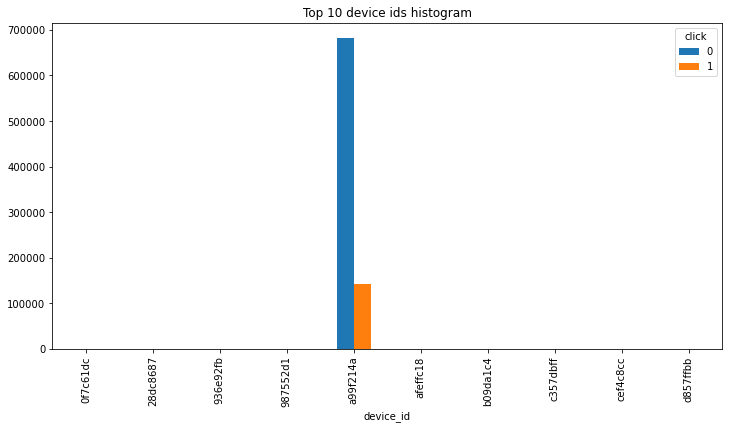

In [134]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids histogram');

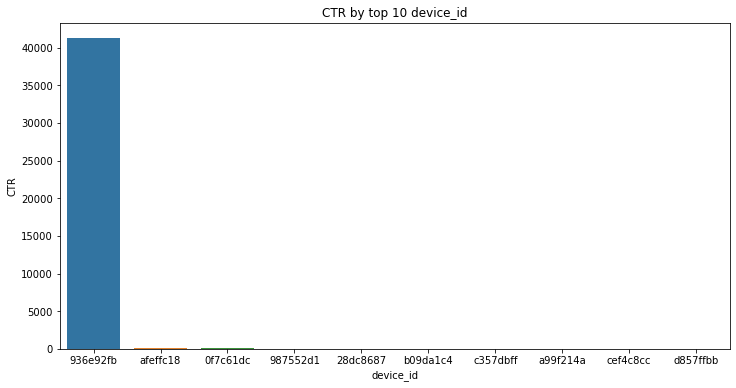

In [135]:
df_device = top10_device[['device_id','click']].groupby(['device_id']).count().reset_index()
df_device = df_device.rename(columns={'click': 'impressions'})
df_device['clicks'] = top10_device_click[['device_id','click']].groupby(['device_id']).count().reset_index()['click']
df_device['CTR'] = df_device['clicks']/df_device['impressions']*100
sort_domain = df_device.sort_values(by='CTR',ascending=False)['device_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_id', data=df_device, order=sort_domain)
plt.title('CTR by top 10 device_id');

<p style="color:blue">La plupart de device_id est a99f214a : ~83 % des données et le deuxième device_id majeur ne représente que 0,05 % des données. Et il y a un CTR extrêmement élevé ici avec l'identifiant de l'appareil à 936e92fb.</p>

<h3>Device type</h3>

In [136]:
train.device_type.nunique()

5

<p style="color:blue">Il y a 5 type appareils dans l'ensemble de données</p>

In [137]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.923115
0    0.054533
4    0.019124
5    0.003227
2    0.000001
Name: device_type, dtype: float64


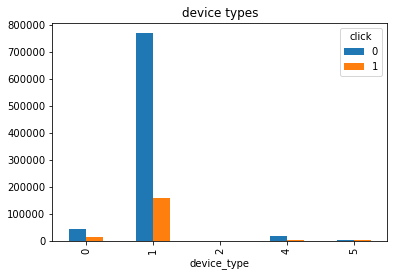

In [138]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

<p style="color:blue">L'appareil de type 1 obtient le plus d'affichage et de clics. Et les autres types d'appareils n'obtiennent que le minimum d'affichage et de clics. Examineons plus en détail le type de périphérique 1.</p>

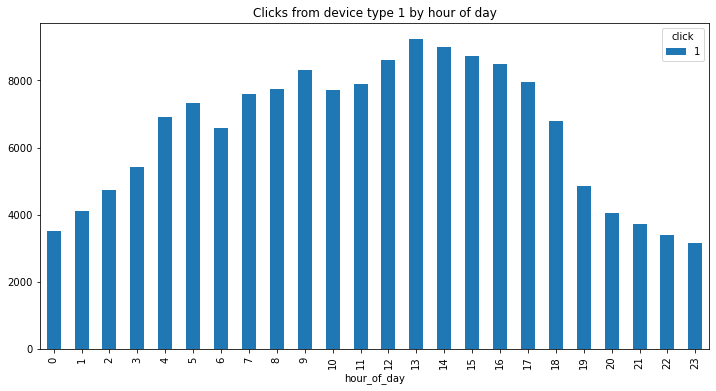

In [139]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

<p style="color:blue">Comme prévu, la plupart des clics se sont produits pendant les heures ouvrables à partir du type d'appareil 1. Le type d'appareil est certainement une caractéristique importante.</p>

In [140]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = train.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100
merged_device_type

,device_type,click,impressions,CTR
0,0,11535,54533,21.152330
1,1,155895,923115,16.887928
2,2,1,1,100.000000
3,4,1874,19124,9.799205
4,5,318,3227,9.854354


<p  style="color:blue">Le CTR le plus élevé provient du type d'appareil 0.</p>

<h3>app features</h3>

In [141]:
print("Il y a {} apps dans l'ensemble de données".format(train.app_id.nunique()))
print("Il y a {} app domains dans l'ensemble de données".format(train.app_domain.nunique()))
print("Il y a {} app categories dans l'ensemble de données".format(train.app_category.nunique()))

Il y a 3179 apps dans l'ensemble de données
Il y a 210 app domains dans l'ensemble de données
Il y a 25 app categories dans l'ensemble de données


<p style="color:blue">Explorons la feature app_category</p>

<AxesSubplot:title={'center':'App Category v/s Impressions'}>

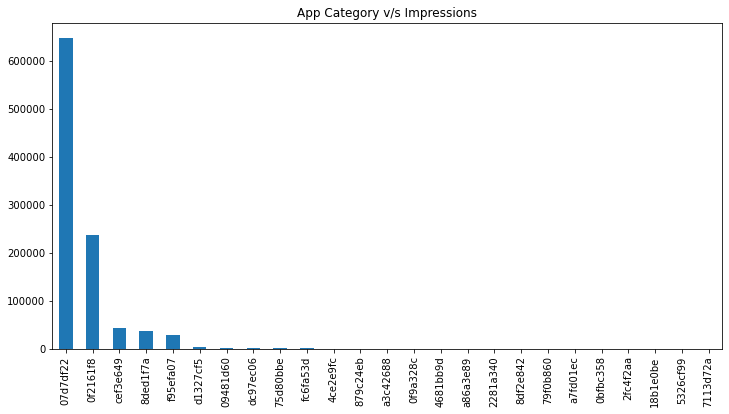

In [142]:
train['app_category'].value_counts().plot(kind='bar', title='App Category v/s Impressions', figsize=(12,6))

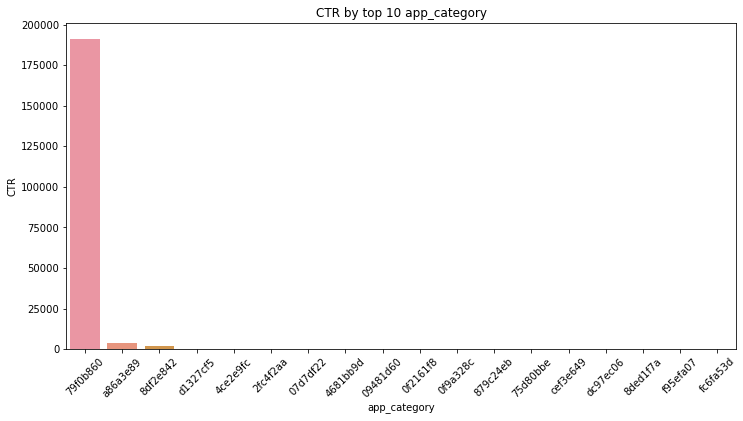

In [143]:
df_device = top10_device[['app_category','click']].groupby(['app_category']).count().reset_index()
df_device = df_device.rename(columns={'click': 'impressions'})
df_device['clicks'] = top10_device_click[['app_category','click']].groupby(['app_category']).count().reset_index()['click']
df_device['CTR'] = df_device['clicks']/df_device['impressions']*100
sort_domain = df_device.sort_values(by='CTR',ascending=False)['app_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='app_category', data=df_device, order=sort_domain)
plt.title('CTR by top 10 app_category');
plt.xticks(rotation=45)
plt.show()

<h3>C14 - C21 features</h3>

In [144]:
print("Il y a  {} C14 dans l'ensemble de données".format(train.C14.nunique()))
print("Il y a  {} C15 dans l'ensemble de données".format(train.C15.nunique()))
print("Il y a  {} C16 dans l'ensemble de données".format(train.C16.nunique()))
print("Il y a  {} C17 dans l'ensemble de données".format(train.C17.nunique()))
print("Il y a  {} C18 dans l'ensemble de données".format(train.C18.nunique()))
print("Il y a  {} C19 dans l'ensemble de données".format(train.C19.nunique()))
print("Il y a  {} C20 dans l'ensemble de données".format(train.C20.nunique()))

Il y a  2244 C14 dans l'ensemble de données
Il y a  8 C15 dans l'ensemble de données
Il y a  9 C16 dans l'ensemble de données
Il y a  420 C17 dans l'ensemble de données
Il y a  4 C18 dans l'ensemble de données
Il y a  66 C19 dans l'ensemble de données
Il y a  163 C20 dans l'ensemble de données


<p style="color:blue">Explorons les features C15, C16 et C18</p>

<AxesSubplot:title={'center':'C18 distribution'}, xlabel='C18'>

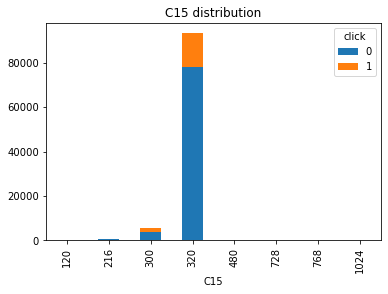

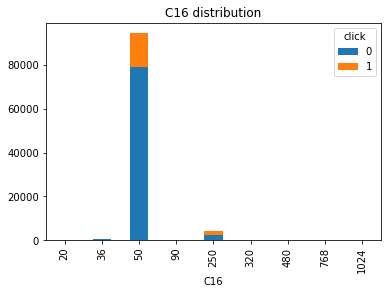

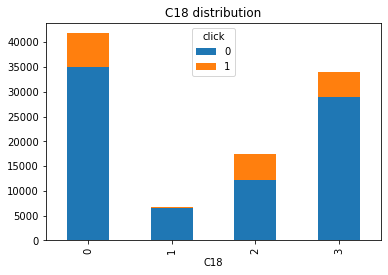

In [49]:
train.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C15 distribution')
train.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C16 distribution')
train.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C18 distribution')

In [145]:
# pour convertir les features object en int
def convert_obj_to_int(self):
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self

In [146]:
train.head(3)

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,10002044883120869786,0,2014-10-21,1005,0,1,0,19771,320,50,2227,0,687,100077,48,0,-3210745766463842838,-5575917436510292403,1550625440661643182,-642934721287594066,275238263005346574,-178697306606691507,-2137223468502959804,-4005547695117434777,7197347749214626025,-972551567689582549
1,10006958186789044052,1,2014-10-21,1005,0,1,0,18993,320,50,2161,0,35,100034,157,0,-6570905262178562839,886968168771278309,-6988551529385690802,8722049485047203559,2555457172140839590,-4394428107520985376,-2137223468502959804,-3932497714001288270,-5895684486687897660,-972551567689582549
2,10009807995169380879,0,2014-10-21,1005,0,1,0,15705,320,50,1722,0,35,100084,79,0,-6570905262178562839,886968168771278309,-6988551529385690802,1932623473710602948,-5182358760538023829,-6214090335838731747,-2137223468502959804,-6973126758685091369,589299371099180770,-972551567689582549


In [182]:
# Pour generer les deux feature hour_of_day et day_of_week
def generate_hour_features(dataset):
    dataset['hour_of_day'] = dataset['hour'].apply(lambda x: x.hour)
    dataset['day_of_week'] = dataset['hour'].apply(lambda val: val.day_name())
    return dataset.drop(["hour"], axis=1)

<h2>Création de modèle</h2>

In [ ]:
train = convert_obj_to_int(train)
train = generate_hour_features(train)

y = train["click"]
X = train.drop(["click", "hour"], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Etape d'apprentissage et de validation</h2>

<p style="color:blue">On est dans un cas de classification d'une feature target qui n'est pas équilibré (17% de 1). j'ai décidé de prendre comme model le Random Forest Classifier<p>

In [200]:
#model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight={0: 1, 1: 5}, verbose=True, random_state=42)
model = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)

train_score, val_score

(0.8324375, 0.8315)

<p style="color:blue">Nous avons eu un resultat de 0,83</p>

In [201]:
y_val_pred = model.predict(X_val)
confusion_matrix(y_val, y_val_pred)

array([[165205,    757],
       [ 32943,   1095]], dtype=int64)

In [202]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91    165962
           1       0.59      0.03      0.06     34038

    accuracy                           0.83    200000
   macro avg       0.71      0.51      0.48    200000
weighted avg       0.79      0.83      0.76    200000



<h2>Etape d'apprentissage et de validation</h2>

In [203]:
test = pd.read_csv("data/test.csv", parse_dates = ['hour'], date_parser = parse_date, dtype=types_train, skiprows = skip_values)

<ipython-input-109-107fcdda1ca9>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')


In [204]:
X_test = generate_hour_features(test)
X_test = convert_obj_to_int(X_test)
y_test_pred = model.predict_proba(X_test)

y_pred_df = pd.DataFrame(y_test_pred, columns=['click_0', 'click_1']) 

In [205]:
y_pred_df['id'] = test['id']

In [206]:
y_pred_df['click'] = y_pred_df['click_1']
y_pred_df.drop(['click_0', 'click_1'], axis=1)
y_pred_df = y_pred_df[['id', 'click']]

y_pred_df

,id,click
0,10002614093820007721,0.165311
1,10006196574590505608,0.161444
2,10009279062006032737,0.191483
3,10009426476019908142,0.418129
4,10011068127763037776,0.278673
...,...,...
113428,9982751356646772317,0.151769
113429,9987951650794211558,0.190899
113430,9993212674850361471,0.127692
113431,999714078500708061,0.127692


In [209]:
y_pred_df.to_csv("data/prediction.csv", index=False)